*Selvtilrettelagt studieenhed*

Import of czi files.
The following is done on a Macbook Pro, m1. Running on the MacOS version: Sonoma 14.0. In general the reader must aware of their operating system.

- Start by going to the website: https://pypi.scm.io/#/package/pylibczirw 
(if site is down visit https://forum.image.sc/t/first-public-release-of-pylibczirw-and-cztile-packages/65517/42 and follow the pypycloud link to find the libraries of you whl.file) ( whl.files format is a direct built distribution to the OS)

- Now you must find the corresponding whl.file too your OS and computer. 
The whl.files is set up in the following way: pylibCZIrw-3.5.1-cp39-cp39-macosx_10_9_universal2.whl
    - pylibCZIrw is the library/ python package that you are about to download.
    - 3.5.1 is describing the version number of the package/library
    - cp39-cp39: These are Python implementation tags indicating compatibility. In this case, it is built for CPython version 3.9
    - macosx_10_9_universal2: This part indicates the platform for which the wheel is built. Specifically, it is built for macOS (macosx), and the version is 10.9. The term "universal2" suggests that the wheel is compatible with both Apple Silicon (ARM) and Intel architectures
    - .whl is the file format is desribed earlier. 

- Download the corresponding file. If there is none of the downloads that correspond to your OS system or computer please visit the forum: https://forum.image.sc/t/wheels-for-pylibczirw/83125 

Great job so far!

Now we must open the .whl file you have downloaded. We recommend to create a whole new kernel. This will make sure you are using the right kernel for the download you have. Make sure to be able to remember the kernel you use. 

For the folling example we are creating a kernel in python 3.11.3 (venv). This corresponds to the one I am using. Make sure that the download you have is for the right kernel. Now we are ready to use the whl.file in the right kernel enviroment
- Start by navigating to the Directory Containing (command is "cd") the .whl File (The following section is done in the terminal. You are therefore required to copy paste it down to the terminal):

- cd "/path/to/your/directory

for me the path is ''' cd "/Users/augusttoft/Desktop/Selvtilrettelagt_studieenhed/Import leverbiopsier" '''

Next you will download the library to the kernel you created. This is done by copying and pasting the following line into the terminal:
- pip install "/Users/augusttoft/Desktop/Selvtilrettelagt_studieenhed/Import leverbiopsier/whl.file for handling CZI files/pylibCZIrw-3.5.2-cp311-cp311-macosx_10_9_universal2.whl"

The output should print this:
Successfully installed cmake-3.28.1 numpy-1.26.3 pylibCZIrw-3.5.2 xmltodict-0.13.0

Now you are done with the terminal

Next step is to restart the kernel. When you have done this, you are finally ready to import into the current workspace. 

In [1]:
from pylibCZIrw import czi as pyczi


To handle the CZI file some other libraries is required. These also need to be install using the "pip install". After installing all the libraries you can run the below code. 

In [2]:
import json

from matplotlib import pyplot as plt

import matplotlib.cm as cm

import numpy as np

import os, sys
''' The os library ( https://docs.python.org/3/library/os.html ) provides a portable way of using operating system dependent functionality.'''
from tqdm import tqdm

from tqdm.contrib import itertools as it

from matplotlib.patches import Rectangle


/Users/gustavpurreskov/Documents/GitHub/Selvtilrettelagt_studieenhed/Import leverbiopsier/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Now we are ready to showcase the CZI files. 

Here is the first liver biopsy. Named "biopsy_0"

In [33]:
# Set the working directory
os.chdir("/Users/gustavpurreskov/Documents/GitHub/Selvtilrettelagt_studieenhed/Import leverbiopsier/Biopsier/Filemail.com files 11_29_2023 intruplnqutxbah")


biopsy_0 = "2022_06_17__RecognizedCode.czi"

# Open the CZI for reading using a context manager
with pyczi.open_czi(biopsy_0) as czidoc:
    # Get pixel data using the Single Channel Scaling Accessor
    pixel_data = czidoc.read()

# Display information about the NumPy array
print("Shape of the NumPy array:", pixel_data.shape)
print("Data type of the NumPy array:", pixel_data.dtype)


Shape of the NumPy array: (19584, 18888, 3)
Data type of the NumPy array: uint8


Here is the second biopsy. Named "Biopsy_1"

In [ ]:
# Set the working directory
os.chdir("/Users/augusttoft/Desktop/Selvtilrettelagt_studieenhed/Import leverbiopsier/Biopsier/Filemail.com files 11_29_2023 intruplnqutxbah")

# Define the filename
biopsy_1 = "2022_06_17__RecognizedCode-1.czi"

# Open the CZI for reading using a context manager
with pyczi.open_czi(biopsy_1) as czidoc:
    # Get pixel data using the Single Channel Scaling Accessor
    pixel_data = czidoc.read()

# Display information about the NumPy array
print("Shape of the NumPy array:", pixel_data.shape)
print("Data type of the NumPy array:", pixel_data.dtype)


Shape of the NumPy array: (20640, 20337, 3)
Data type of the NumPy array: uint8


Getting info about the CZI file for further feature extraction in biopsy_0

In [ ]:
# open the CZI for reading
with pyczi.open_czi(biopsy_0) as czidoc:
    
    # get the raw metadata as a dictionary
    md_dict = czidoc.metadata
    
    # show some parts of it
    print(json.dumps(md_dict["ImageDocument"]["Metadata"]["Information"]["Image"], sort_keys=False, indent=4))

{
    "AcquisitionDateAndTime": "2022-06-17T08:27:22.0464872Z",
    "SizeC": "1",
    "ComponentBitCount": "8",
    "PixelType": "Bgr24",
    "SizeX": "18819",
    "SizeY": "19506",
    "SizeS": "1",
    "SizeM": "178",
    "OriginalCompressionMethod": "JpgXr",
    "OriginalEncodingQuality": "85",
    "AcquisitionDuration": "91337.4995",
    "Dimensions": {
        "Channels": {
            "Channel": {
                "@Id": "Channel:0",
                "@Name": "Bright",
                "Color": "#00FFFFFF",
                "Fluor": "Bright",
                "ExposureTime": "200000",
                "CondenserContrast": "NA 0.45 BF",
                "IlluminationType": "Transmitted",
                "ContrastMethod": "Brightfield",
                "PixelType": "Bgr24",
                "ComponentBitCount": "8",
                "AcquisitionMode": "WideField",
                "IlluminationWavelength": null,
                "DetectionWavelength": null,
                "DetectorSettings":

Getting info about the CZI file for further feature extraction in biopsy_1

In [ ]:
# open the CZI for reading
with pyczi.open_czi(biopsy_1) as czidoc:
    
    # get the raw metadata as a dictionary
    md_dict = czidoc.metadata
    
    # show some parts of it
    print(json.dumps(md_dict["ImageDocument"]["Metadata"]["Information"]["Image"], sort_keys=False, indent=4))

{
    "AcquisitionDateAndTime": "2022-06-17T08:28:20.4969862Z",
    "SizeC": "1",
    "ComponentBitCount": "8",
    "PixelType": "Bgr24",
    "SizeX": "20266",
    "SizeY": "20578",
    "SizeS": "1",
    "SizeM": "172",
    "OriginalCompressionMethod": "JpgXr",
    "OriginalEncodingQuality": "85",
    "AcquisitionDuration": "61116.420000000006",
    "Dimensions": {
        "Channels": {
            "Channel": {
                "@Id": "Channel:0",
                "@Name": "Bright",
                "Color": "#00FFFFFF",
                "Fluor": "Bright",
                "ExposureTime": "200000",
                "CondenserContrast": "NA 0.45 BF",
                "IlluminationType": "Transmitted",
                "ContrastMethod": "Brightfield",
                "PixelType": "Bgr24",
                "ComponentBitCount": "8",
                "AcquisitionMode": "WideField",
                "DetectorSettings": {
                    "Binning": "1,1",
                    "HasFocusRoi": "true",
 

In [ ]:
with pyczi.open_czi(biopsy_0) as czidoc:
    tbb = czidoc.total_bounding_box

print(tbb)

{'T': (0, 1), 'Z': (0, 1), 'C': (0, 1), 'X': (-87848, -68960), 'Y': (17280, 36864)}


In [ ]:
with pyczi.open_czi(biopsy_0) as czidoc:
    pt = czidoc.pixel_types

print(pt)

{0: 'Bgr24'}


Array Shape:  (19584, 18888, 3)


Text(0.5, 1.0, 'Frame_0')

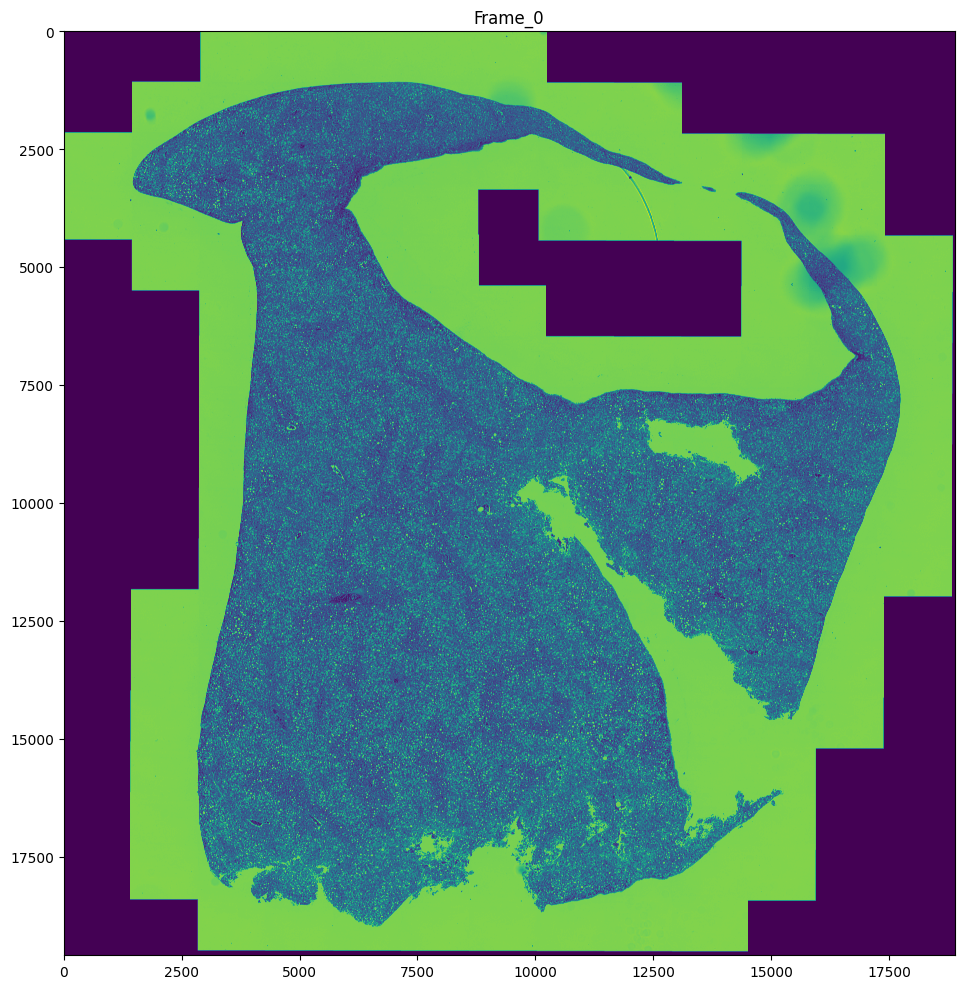

In [ ]:
with pyczi.open_czi(biopsy_0) as czidoc:
    
    # define some plane coordinates
    plane_1 = {'C': 0, 'Z': 0, 'T': 0}

    # equivalent to reading {'C': 0, 'Z': 0, 'T': 0}
    frame_0 = czidoc.read()

    # get the shape of the 2d plane - the last dime indicates the pixel type
    # 3 = BGR and 1 = Gray
    print("Array Shape: ", frame_0.shape)

    # get specific planes 
    frame_1 = czidoc.read(plane=plane_1)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(frame_0[..., 0], cmap=cm.viridis)
ax.set_title("Frame_0")


Array Shape:  (20640, 20337, 3)


Text(0.5, 1.0, 'Frame_0')

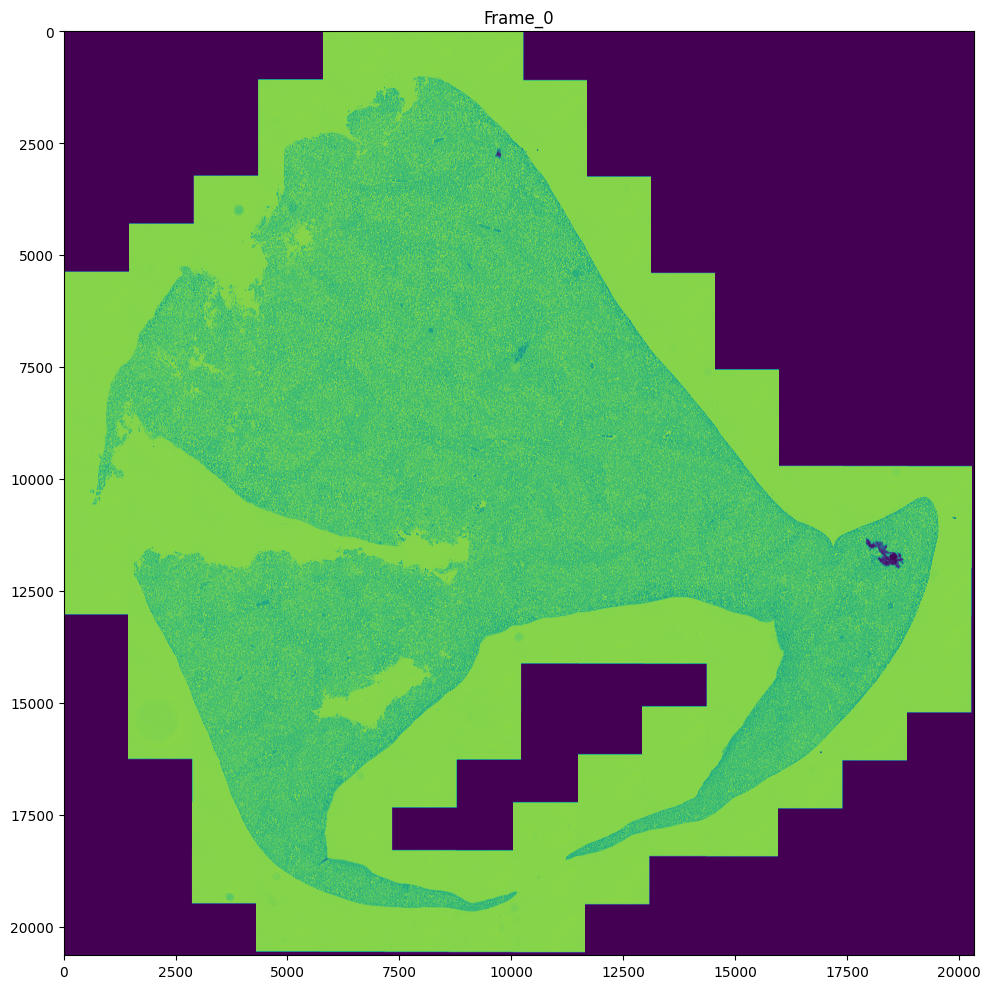

In [ ]:
with pyczi.open_czi(biopsy_1) as czidoc:
    
    # define some plane coordinates
    plane_1 = {'C': 0, 'Z': 0, 'T': 0}

    # equivalent to reading {'C': 0, 'Z': 0, 'T': 0}
    frame_0 = czidoc.read()

    # get the shape of the 2d plane - the last dime indicates the pixel type
    # 3 = BGR and 1 = Gray
    print("Array Shape: ", frame_0.shape)

    # get specific planes 
    frame_1 = czidoc.read(plane=plane_1)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(frame_0[..., 0], cmap=cm.viridis)
ax.set_title("Frame_0")

We are also able to read som Region Of Interest (ROI)
The roi is a tuple defined as a (axis-aligned) rectangle in (x, y, w, h) form, with:

x = x coordinate of upper-left point
y = y coordinate of upper-left point
w = rectangle width
h = rectangle height

Text(0.5, 1.0, 'ch0')

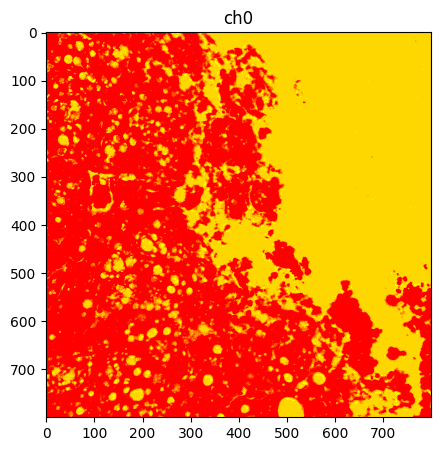

In [ ]:
# define the ROI using upper left, widht and height as coordinates
my_roi = (-78000, 27500, 800, 800)

with pyczi.open_czi(biopsy_0) as czidoc:
    ch0 = czidoc.read(roi=my_roi, plane={'C': 0})

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.imshow(ch0[...,0], cmap=cm.prism, vmin=100, vmax=4000)
ax.set_title("ch0")


Text(0.5, 1.0, 'ch0')

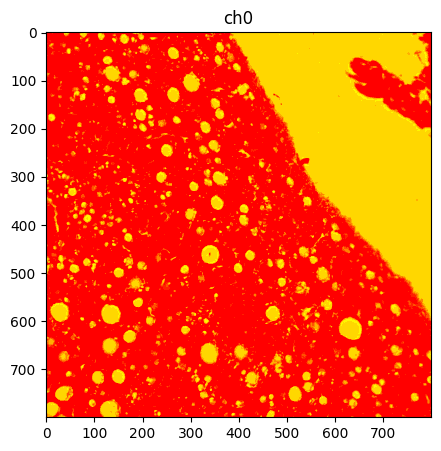

In [ ]:
# define the ROI using upper left, widht and height as coordinates
my_roi = (-77000, 28500, 800, 800)

with pyczi.open_czi(biopsy_0) as czidoc:
    ch0 = czidoc.read(roi=my_roi, plane={'C': 0})

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.imshow(ch0[...,0], cmap=cm.prism, vmin=100, vmax=4000)
ax.set_title("ch0")

In [ ]:
# Assuming 'pixel_data' is your NumPy array
middle_x = pixel_data.shape[1] // 2
middle_y = pixel_data.shape[0] // 2

# Extract a 10x10 region of RGB values centered around the middle of the image
start_x = middle_x - 5
end_x = middle_x + 5
start_y = middle_y - 5
end_y = middle_y + 5

# Ensure the region is within the image boundaries
start_x = max(0, start_x)
end_x = min(pixel_data.shape[1], end_x)
start_y = max(0, start_y)
end_y = min(pixel_data.shape[0], end_y)

# Extract the RGB values in the specified region
rgb_matrix = pixel_data[start_y:end_y, start_x:end_x, :]

# Display the RGB values as a 10x10 matrix
print("RGB Values in a 10x10 region around the middle of the image:")
print(rgb_matrix.reshape(10, 10, 3))


RGB Values in a 10x10 region around the middle of the image:
[[[ 63  88 121]
  [ 64  83 114]
  [ 71  90 118]
  [ 83 103 129]
  [ 83 113 147]
  [ 79 114 152]
  [ 80 105 138]
  [ 79  94 128]
  [ 82 100 132]
  [ 83 115 143]]

 [[ 74 100 130]
  [ 76  96 124]
  [ 78  98 125]
  [ 90 112 140]
  [ 81 111 147]
  [ 71 105 142]
  [ 76 104 138]
  [ 76 101 138]
  [ 81 109 144]
  [ 79 119 150]]

 [[ 84 112 143]
  [ 91 113 140]
  [ 88 112 140]
  [ 97 127 163]
  [ 88 125 167]
  [ 75 110 150]
  [ 75 107 146]
  [ 74 107 154]
  [ 74 105 148]
  [ 72 106 141]]

 [[ 90 123 158]
  [ 95 126 160]
  [ 87 119 154]
  [ 85 122 164]
  [ 77 115 159]
  [ 74 107 146]
  [ 76 108 149]
  [ 70 107 158]
  [ 64  95 141]
  [ 63  90 126]]

 [[ 89 126 167]
  [ 86 127 170]
  [ 76 118 161]
  [ 68 108 150]
  [ 59  95 133]
  [ 64  94 126]
  [ 74 104 139]
  [ 72 107 151]
  [ 69  96 136]
  [ 70  90 124]]

 [[ 80 117 160]
  [ 76 116 163]
  [ 71 110 157]
  [ 65 101 143]
  [ 58  87 124]
  [ 61  86 120]
  [ 71  98 134]
  [ 74 105 143]
 

Shape Zoomlevel =  1.0 (800, 800, 3)
Shape Zoomlevel =  0.25 (200, 200, 3)


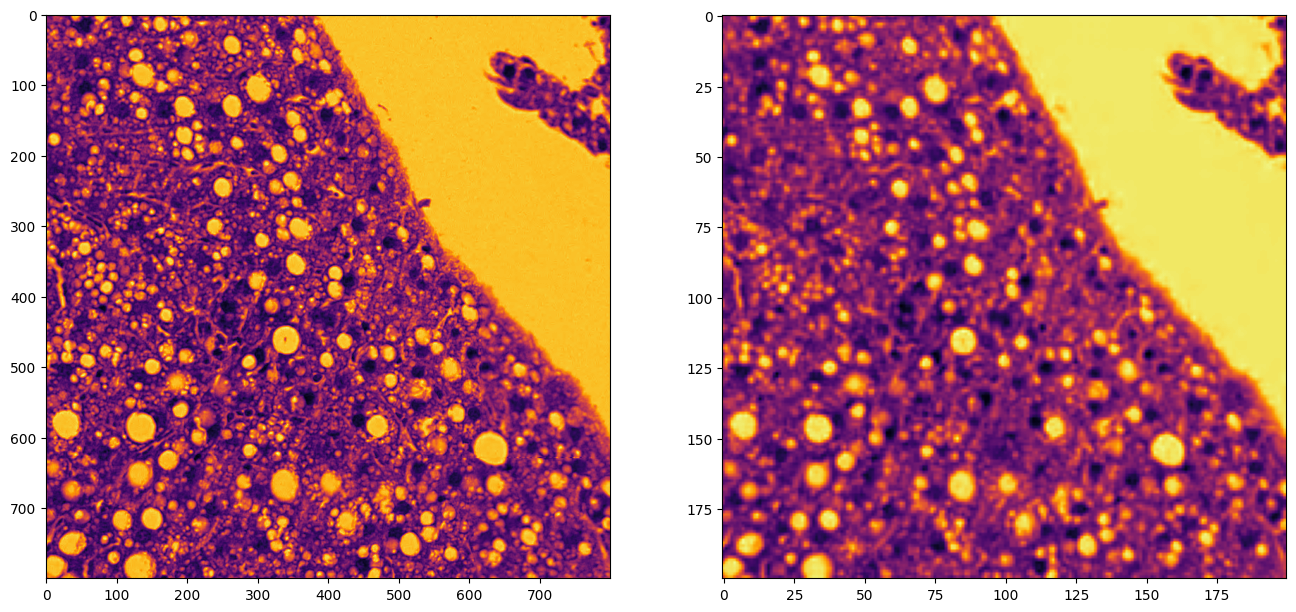

In [ ]:
# define the ROI using upper left, width and height as coordinates
my_roi = (-77000, 28500, 800, 800)
# define two different zoom factors
zl1 = 1.0
zl2 = 0.25

with pyczi.open_czi(biopsy_0) as czidoc:
    z1 = czidoc.read(plane={'C': 0}, roi=my_roi, scene=0, zoom=zl1, pixel_type='Bgr24')
    z2 = czidoc.read(plane={'C': 0}, roi=my_roi, scene=0, zoom=zl2, pixel_type='Bgr24')

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(z1[...,0], cmap=cm.inferno)
ax[1].imshow(z2[...,0], cmap=cm.inferno)

print("Shape Zoomlevel = ", zl1, z1.shape)
print("Shape Zoomlevel = ", zl2, z2.shape)


In [ ]:
with pyczi.open_czi(biopsy_0) as czidoc:
    # define some plane coordinates
    plane_1 = {'C': 0, 'Z': 2, 'T': 1}
    plane_2 = {'C': 1, 'Z': 3, 'T': 2}

    # equivalent to reading {'C': 0, 'Z': 0, 'T': 0}
    frame_0 = czidoc.read()

    # get specific planes with valid pixel type (e.g., Gray8)
    frame_1 = czidoc.read(plane=plane_1, pixel_type='Gray8')
    frame_2 = czidoc.read(plane=plane_2, pixel_type='Bgr24')

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(frame_0[..., 0], cmap=cm.inferno)
ax[0].set_title("Frame_0")
ax[1].imshow(frame_1[..., 0], cmap=cm.inferno)
ax[1].set_title("Frame_1")
ax[2].imshow(frame_2[..., 0], cmap=cm.Greens_r)
ax[2].set_title("Frame_2")

plt.show()


RuntimeError: Coordinate for dimension 'C' is out-of-range.